In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Load the training dataset
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values  # Only 'Open' column

In [3]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
# Building the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0471
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.9514e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.5906e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8438e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5885e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9760e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.4156e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.0192e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4739e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9751e-04
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0548e-04
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.9572e-04
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0511e-04
Epoch 15/

In [7]:
# Load test data
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [8]:
# Combine train and test for consistent scaling
total_dataset = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = total_dataset[len(total_dataset) - len(dataset_test) - 60:].values.reshape(-1, 1)
inputs = sc.transform(inputs)

In [9]:
# Prepare test inputs
X_test = []
for i in range(60, 60 + len(dataset_test)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Predicting stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


In [11]:
# Evaluation Metrics
mse = mean_squared_error(real_stock_price, predicted_stock_price)
rmse = math.sqrt(mse)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)

# Print evaluation results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 65.00
Root Mean Squared Error (RMSE): 8.06
Mean Absolute Error (MAE): 6.05
R² Score: 0.7009


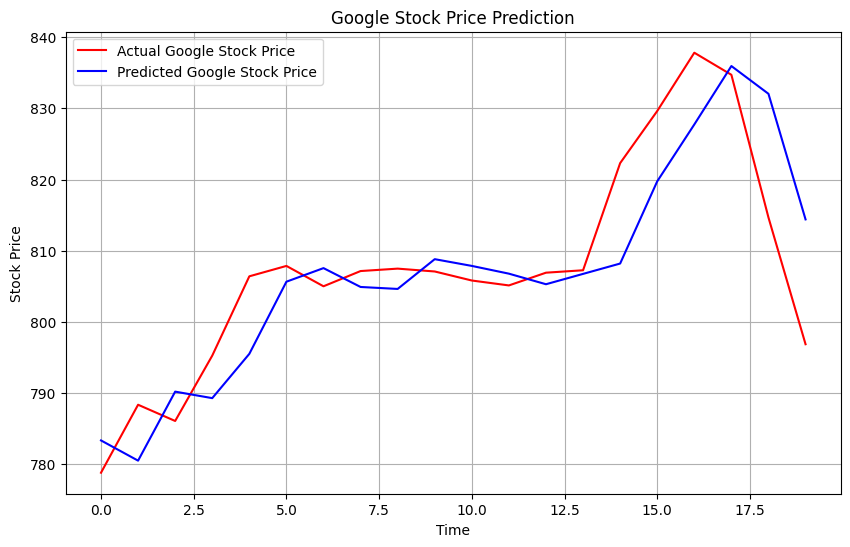

In [12]:
# Plotting actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='red', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()